In [1]:
# %matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const

from li.diagnostic import trap_frequency
from li.diagnostic import U_dip
from li.diagnostic import breit_rabi
from li.visualize import breit_rabi_visualize

from scipy.optimize import curve_fit

# mpl.use("Qt5Agg")

In [2]:
trap = trap_frequency(780e-9, 10e-3, 50e-6)
u1 = U_dip(780e-9, 10e-3, 50e-6, False) / const.k
u2 = U_dip(780e-9, 10e-3, 50e-6, True, 136)
print(trap)
print(u1)
print(u2)


136.3785226168286
3.3200285037809446e-07
3.3016244055258836e-07


In [3]:
# todo

# Scattering length
# ln(k_f a_2D)
    # Scattering length in 2D, 3D

In [4]:
# DP = np.array([0.00065, 0.0013, 0.002, 0.0026, 0.0052, 0.0026])
# w = np.array([0.01, 0.00674, 0.005, 0.00371, 0.00342, 0.00356])

DP = np.array([0.00065, 0.0013, 0.002, 0.0026])
w = np.array([0.01, 0.00674, 0.005, 0.00355])

trap_f = 1/2 * 1/w
U = U_dip(780, 10e-3, 50e-6, True, trap_f)

U

array([4.46261949e-08, 9.82358631e-08, 1.78504780e-07, 3.54105891e-07])

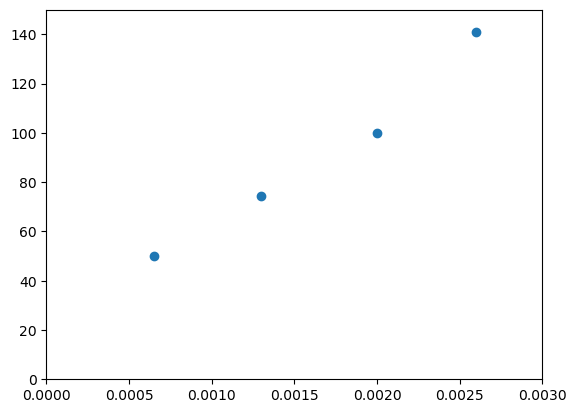

In [5]:
plt.scatter(DP, trap_f)
plt.xlim(0,0.003)
plt.ylim(0,150)

plt.show()

In [6]:
trap_f

array([ 50.        ,  74.18397626, 100.        , 140.84507042])

In [7]:
def funccc(x, a, b, c):
    return a * x**b + c

In [8]:
popt, pcov = curve_fit(funccc, DP, trap_f, p0 = [3000, 0.5, 0], bounds = ([2000, 0.4, 0], [6000, 0.5, 0.0001]))

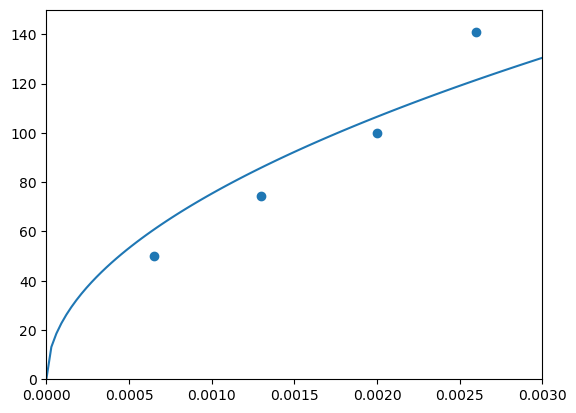

In [9]:
plt.scatter(DP, trap_f)

plt.plot(np.linspace(0, 0.003, 100), funccc(np.linspace(0, 0.003, 100), popt[0], popt[1], popt[2]))
# plt.plot(np.linspace(0, 0.003, 100), funccc(np.linspace(0, 0.003, 100), 3000, 0.5, 0))

plt.xlim(0,0.003)
plt.ylim(0,150)

plt.show()

In [10]:
popt

array([2.38219080e+03, 5.00000000e-01, 6.06309997e-21])

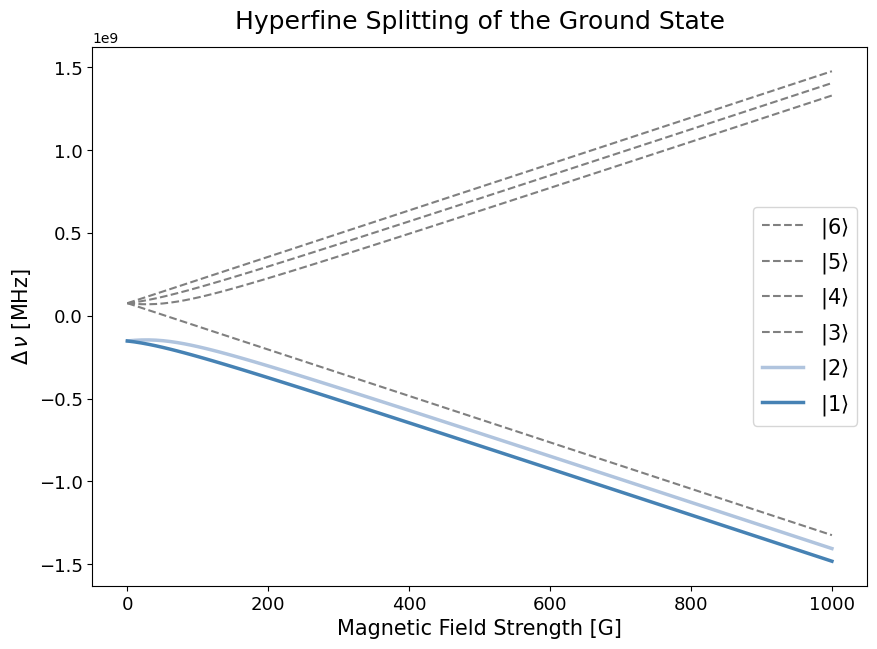

In [11]:
breit_rabi_visualize(np.linspace(0, 1000, 100), [1, 2])

In [12]:
(breit_rabi(1000, 3) - breit_rabi(1000, 2)) * 1e-6

80.93208893082642

In [13]:
scattering_lengths = np.loadtxt("scattering_length_Li6_a_vs_B_12_13_23.txt", skiprows = 1)

In [14]:
scattering_lengths[0]

array([ 1.000e+00, -7.000e-01, -8.204e+02,  2.460e+01])

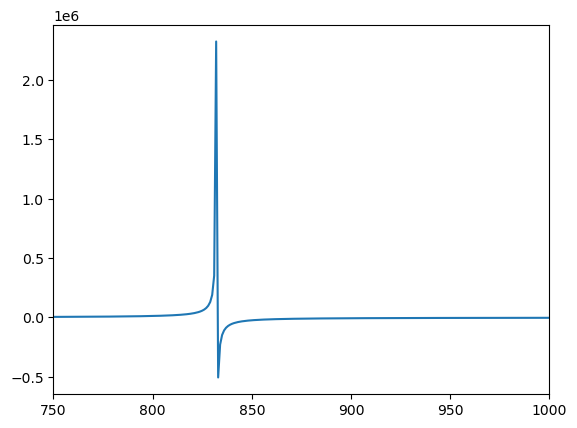

In [15]:
plt.plot(scattering_lengths[:, 0], scattering_lengths[:, 1])

plt.xlim(750, 1000)

plt.show()

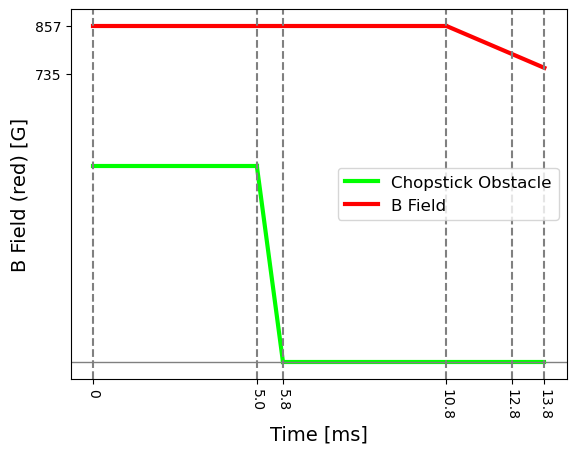

In [23]:
# constants
cs = 10      # speed of sound [um/ms]
x = 10       # distance traveled by obstacle [um]
v = 0.2 * cs # obstacle velocity [um/ms]
V0 = 500     # obstacle potential [in units of chemical potential]
B_BCS = 857  # magnetic field on BCS side [G]
B_BEC = 750  # magnetic field on BEC side [G]

# durations
t_obstacle = x/v           # obstacle splitting [ms]
t_obstacle_ramp_down = 0.8 # obstacle ramp down [ms]
t_hold = 5                # hold time [ms]
t_TOF = 1
t_B_ramp = 3

# timing edges
TIMING_obstacle_split = 0                                      # effective start of the experiment [ms]
TIMING_obstacle_ramp_down = TIMING_obstacle_split + t_obstacle # obstacle ramp down [ms]
TIMING_hold = TIMING_obstacle_ramp_down + t_obstacle_ramp_down # hold [ms]
TIMING_B_ramp = TIMING_hold + t_hold
TIMING_TOF = TIMING_B_ramp + t_B_ramp - t_TOF
TIMING_image = TIMING_B_ramp + t_B_ramp
TIMING_end = TIMING_image                                         # [ms]


# chopsticks
time = np.linspace(TIMING_obstacle_split, TIMING_obstacle_ramp_down, 100)
plt.plot(time, V0 * np.ones(len(time)), color = 'lime', lw = 3)

time = np.linspace(TIMING_obstacle_ramp_down, TIMING_hold, 100)
plt.plot(time, -V0/t_obstacle_ramp_down * (time - t_obstacle) + V0, color = 'lime', lw = 3)

time = np.linspace(TIMING_hold, TIMING_end, 100)
plt.plot(time, np.zeros(len(time)), color = 'lime', lw = 3, label = "Chopstick Obstacle")

# B field
time = np.linspace(TIMING_obstacle_split, TIMING_B_ramp, 100)
plt.plot(time, B_BCS * np.ones(len(time)), color = 'red', lw = 3)

time = np.linspace(TIMING_B_ramp, TIMING_image, 100)
plt.plot(time, -(B_BCS-B_BEC)/t_B_ramp * (time - TIMING_B_ramp) + B_BCS, color = 'red', lw = 3)

time = np.linspace(TIMING_image, TIMING_end, 100)
plt.plot(time, B_BEC * np.ones(len(time)), color = 'red', lw = 3, label = "B Field")



plt.axvline(TIMING_obstacle_split, ls = "--", color = "grey")
plt.axvline(TIMING_obstacle_ramp_down, ls = "--", color = "grey")
plt.axvline(TIMING_hold, ls = "--", color = "grey")
plt.axvline(TIMING_B_ramp, ls = "--", color = "grey")
plt.axvline(TIMING_TOF, ls = "--", color = "grey")
plt.axvline(TIMING_image, ls = "--", color = "grey")


plt.axhline(0, ls = "-", color = "grey", lw = 1)

# plt.xlim(-1, 15)

plt.xticks([TIMING_obstacle_split, TIMING_obstacle_ramp_down, TIMING_hold, TIMING_B_ramp, TIMING_TOF, TIMING_image],
           [TIMING_obstacle_split, TIMING_obstacle_ramp_down, TIMING_hold, TIMING_B_ramp, TIMING_TOF, TIMING_image], rotation = -90)
plt.yticks([735, 857], [735, 857])

plt.xlabel("Time [ms]", fontsize = 14)
plt.ylabel("B Field (red) [G]", fontsize = 14)

plt.legend(loc = "center right", fontsize = 12)

plt.show()

In [20]:
1/(2 * const.pi * 1.5e-6)

106103.29539459689